In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [6]:
import numpy as np
import pandas as pd
import pandas_profiling as pp  ## This is Profiling library which is helps to create an report about data just in one commond.
import matplotlib.pyplot as plt


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.0.3/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.0.3/u/import-error

## Reading the data.

In [9]:
df = pd.read_csv("flights_data.csv")

In [10]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
profile = pp.ProfileReport(df) ## Creating an report of an df

NameError: name 'pp' is not defined

In [14]:
profile.to_file("output.html") ## Creating an html file of on report.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(df.head())

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [13]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [14]:
print(df.dtypes)

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


### Analyze the airlines:

In [15]:
flight_count = df['airline'].value_counts()

In [16]:
flight_count

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

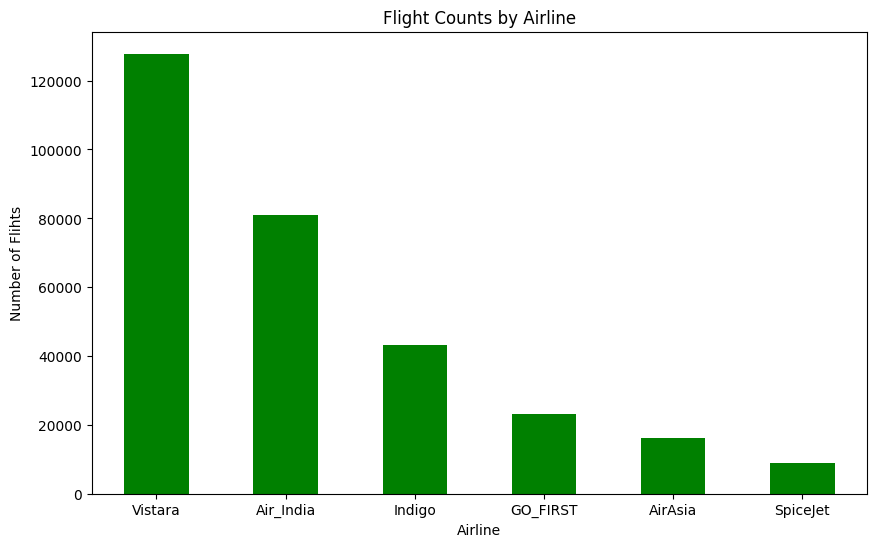

In [17]:
plt.figure(figsize=(10,6))
colors = ['green'] 

flight_count.plot(kind = 'bar',color = colors)
plt.xlabel('Airline',rotation = 0)
plt.ylabel('Number of Flihts')
plt.title('Flight Counts by Airline')
plt.xticks(rotation=0)  # Set the rotation angle to 45 degrees

plt.show()

## Calculating the average fliht duration for each airline

In [18]:
avg_duration = df.groupby("airline")['duration'].mean()
avg_duration

airline
AirAsia       8.941714
Air_India    15.504235
GO_FIRST      8.755380
Indigo        5.795197
SpiceJet     12.579767
Vistara      13.326634
Name: duration, dtype: float64

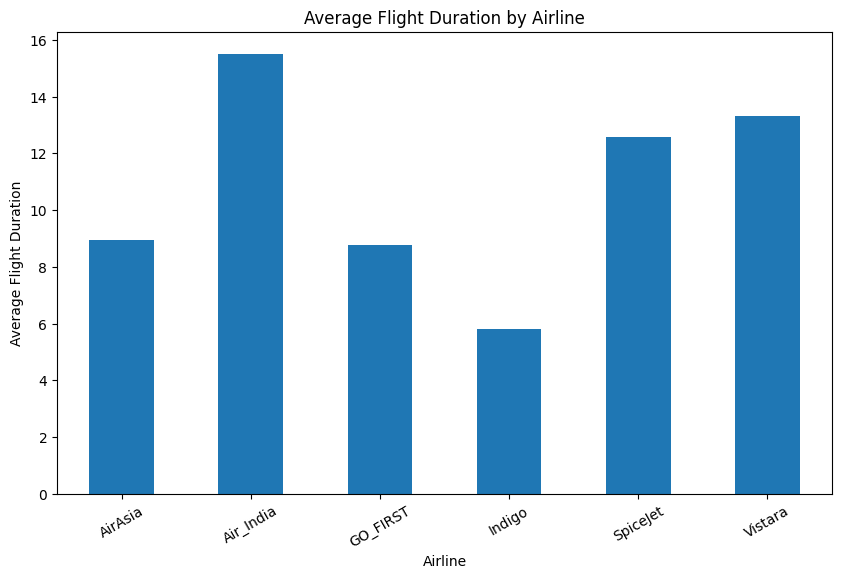

In [19]:
plt.figure(figsize=(10,6))
avg_duration.plot(kind = 'bar')

plt.xlabel('Airline')
plt.ylabel('Average Flight Duration')
plt.title('Average Flight Duration by Airline')
plt.xticks(rotation=30)  # Set the rotation angle to 45 degrees

plt.show()

In [20]:
## Calculate the minimum, maximum, and average flight prices for each airline

In [40]:

# min_price = df.groupby(['airline'],as_index = False)['price'].min()
# max_price = df.groupby(['airline'],as_index = False)['price'].max()
# avg_price = df.groupby(['airline'],as_index = False)['price'].mean()

In [43]:
min_price = df.groupby('airline')['price'].min()
max_price = df.groupby('airline')['price'].max()
avg_price = df.groupby('airline')['price'].mean()

In [44]:
max_price

airline
AirAsia       31917
Air_India     90970
GO_FIRST      32803
Indigo        31952
SpiceJet      34158
Vistara      123071
Name: price, dtype: int64

In [45]:
airline_stats = pd.concat([min_price,max_price,avg_price],axis = 1)
airline_stats.columns = ['Min Price', 'Max Price', 'Avg Price']

print(airline_stats)

           Min Price  Max Price     Avg Price
airline                                      
AirAsia         1105      31917   4091.072742
Air_India       1526      90970  23507.019112
GO_FIRST        1105      32803   5652.007595
Indigo          1105      31952   5324.216303
SpiceJet        1106      34158   6179.278881
Vistara         1714     123071  30396.536302


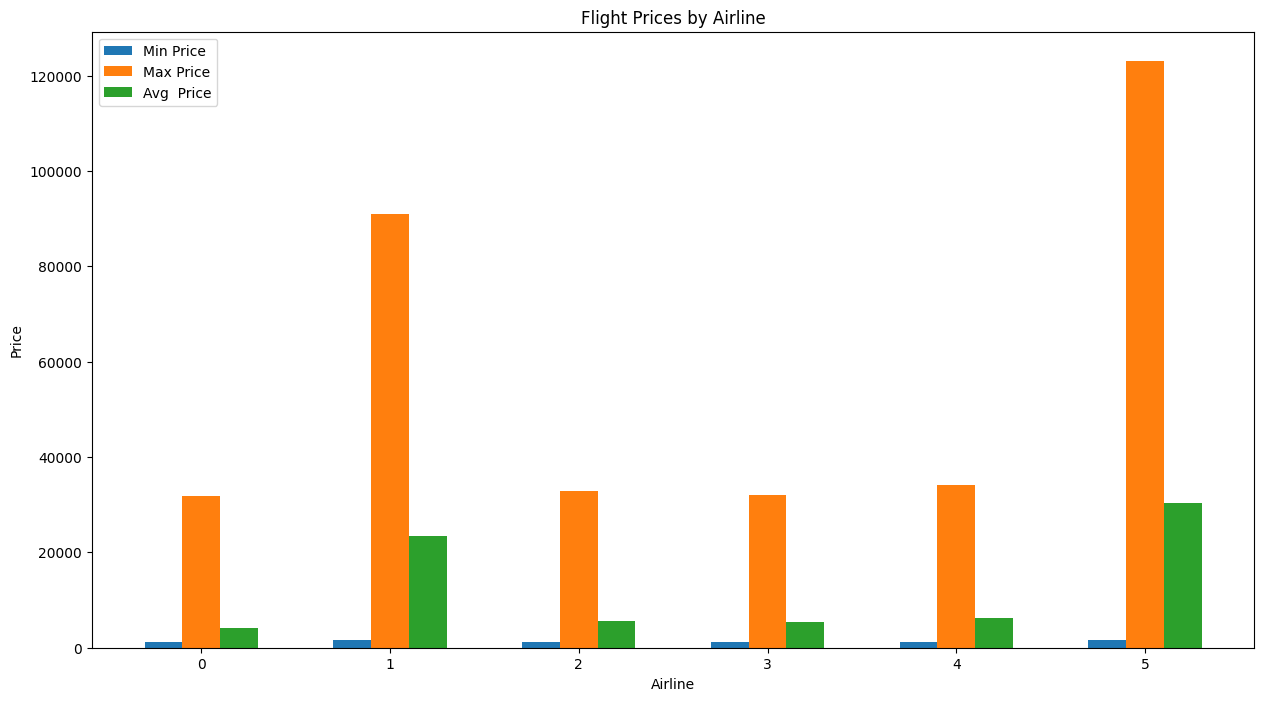

In [55]:
airline = ['AirAsia','Air_India','GO_FIRST','Indigo','SpiceJet','Vistara']
x = np.arange(len(airline))

width = 0.2
plt.figure(figsize=(15,8))


plt.bar(x - width,airline_stats['Min Price'], width,label = 'Min Price')
plt.bar(x,airline_stats['Max Price'],width, label = 'Max Price')
plt.bar(x + width, airline_stats['Avg Price'], width, label='Avg  Price')

# plt.xticks(airline)
plt.xlabel('Airline')

plt.ylabel('Price')

plt.title('Flight Prices by Airline')

# set(xlabel = airline)
plt.legend()
plt.show()

## Analyze the flight routes by examining the source and destination cities.

In [94]:
print("Number of Flights: ", len(df))
print("Available Airlines :", df["airline"].nunique())
print("Unique source cities :", df['source_city'].nunique())
print("Unique destination cities :", df['destination_city'].nunique())


Number of Flights:  300153
Available Airlines : 6
Unique source cities : 6
Unique destination cities : 6


In [95]:
# Top Airlines by Number of Flights
top_airlines = df['airline'].value_counts().head(5)
print("\nTop Airlines by Number of Flights:")
print(top_airlines)


Top Airlines by Number of Flights:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
Name: airline, dtype: int64


In [97]:
# Busiest Source Cities
busiest_sourse_cities = df['source_city'].value_counts()
busiest_sourse_cities

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [99]:
# Most Common Destination City
most_common_destination_city = df['destination_city'].value_counts()
most_common_destination_city

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [100]:
# Correlation between Duration and Price
correlation = df['duration'].corr(df['price'])
correlation

0.20422236784542708

### Investigate the relationship between flight duration and the number of stops.

In [102]:
# duration = df['duration']
# stops = df['stops']
# plt.figure(figsize=(10,6))
# plt.scatter(stops,duration)

# plt.xlabel("Number of Stops")
# plt.ylabel("Flight Duration (Minutes)")

# plt.title("Flight Duration vs Number of Stops")

# plt.show()

In [105]:
df

,df_index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Time Analysis:

In [120]:
# # Analyze the distribution of flights throughout the day based on departure and arrival times.
# plt.xlabel("Deperture Time Preiod")
# plt.ylabel("Frequncy")
# plt.title("Distrubution of Flights by Deperture Time")

# plt.show()

In [140]:
# Group flights by arrival time period
arrival_counts = df['arrival_time'].value_counts()

# Define time categories
time_categories  = {'morning' : ['Morning'],
            'early_morning' : ['Early_Morning'],
             'evening' : ['Evening'],
              'afternoon' : ['Afternoon'],
               'nignt' : ['Night'],
           }

df['arrival_time_category'] = df['arrival_time'].map(
    lambda x: next((key for key, values in time_categories .items() if x in values), None)
)

# Group flights by arrival time category
arrival_category_counts = df['arrival_time_category'].value_counts()

# Identify peak arrival time categories
peak_arrival_categories = arrival_category_counts[arrival_category_counts == arrival_category_counts.max()].index.tolist()

# Group flights by departure time period
departure_counts = df['departure_time'].value_counts()

# Create a new column to map time categories for departure time
df['departure_time_category'] = df['departure_time'].map(
    lambda x: next((key for key, values in time_categories.items() if x in values), None)
)

# Group flights by departure time category
departure_category_counts = df['departure_time_category'].value_counts()

# Identify peak departure time categories
peak_departure_categories = departure_category_counts[departure_category_counts == departure_category_counts.max()].index.tolist()

print("Peak Arrival Time Categories:", peak_arrival_categories)
print("Peak Departure Time Categories:", peak_departure_categories)

Peak Arrival Time Categories: ['nignt']
Peak Departure Time Categories: ['morning']


In [141]:
df

,df_index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,arrival_time_category,departure_time_category
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,nignt,evening
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,morning,early_morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,early_morning,early_morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,afternoon,morning
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,evening,morning
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,nignt,afternoon
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,nignt,early_morning
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,evening,early_morning


In [144]:
source_arrival_counts = df.groupby(['source_city', 'arrival_time_category']).size()
source_departure_counts = df.groupby(['source_city', 'departure_time_category']).size()

In [145]:
source_arrival_counts

source_city  arrival_time_category
Bangalore    afternoon                 6992
             early_morning             3154
             evening                  14493
             morning                  10411
             nignt                    14338
Chennai      afternoon                 5152
             early_morning             1606
             evening                  10830
             morning                   7106
             nignt                    12007
Delhi        afternoon                 8007
             early_morning             5262
             evening                  14630
             morning                  13007
             nignt                    18294
Hyderabad    afternoon                 4816
             early_morning             1581
             evening                  10539
             morning                   8854
             nignt                    12924
Kolkata      afternoon                 5941
             early_morning             21

In [148]:
source_departure_counts

source_city  departure_time_category
Bangalore    afternoon                   5183
             early_morning              13611
             evening                    14243
             morning                    12323
             nignt                       6244
Chennai      afternoon                   5807
             early_morning               9319
             evening                     5402
             morning                    10550
             nignt                       7550
Delhi        afternoon                  11234
             early_morning              12248
             evening                    16790
             morning                    13679
             nignt                       7035
Hyderabad    afternoon                   7221
             early_morning               8524
             evening                     5991
             morning                     9923
             nignt                       9109
Kolkata      afternoon                   78

In [152]:
source_arrival_counts.idxmax()

('Mumbai', 'nignt')

In [153]:
source_departure_counts.idxmax()

('Delhi', 'evening')

In [155]:
# how to find the peak time for a all airport as consedering a arrival time and deperture time?????  